# Análise da relação entre o desenvolvimento humano (IFDM) e a gestão fiscal (IFGF).

Este estudo investiga como os indicadores IFDM e IFGF se correlacionam, buscando compreender possíveis impactos da gestão fiscal no desenvolvimento humano dos municípios.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [ ]:
df = pd.read_csv('data/dados_painel_consolidado.csv', index_col=0)

df.head()

,Código,Município,Ano,IFGF,C_IFGF,IFDM,C_IFDM
0,330010,Angra dos Reis,2013,0.289811,Crítica,0.6387,Moderado
1,330015,Aperibé,2013,NaN,Crítica,0.5717,Baixo
2,330020,Araruama,2013,0.335870,Crítica,0.5330,Baixo
3,330022,Areal,2013,0.618364,Boa Gestão,0.6244,Moderado
4,330023,Armação dos Búzios,2013,0.420488,Dificuldade,0.6004,Moderado


Categorizacao das faixas no pandas em tipo de dado Categorias

In [4]:
df.C_IFGF = df.C_IFGF.astype(
    CategoricalDtype(
        categories=['Excelência', 'Boa Gestão', 'Dificuldade', 'Crítica'],
        ordered=True
    )
)

df.C_IFDM = df.C_IFDM.astype(
    CategoricalDtype(
        categories=['Moderado', 'Baixo', 'Crítico'],
        ordered=True
    )
)


## Análise das classificacoes do IFDM e IFGV

In [24]:
from ifdm_analysis import IFDMTemporalPlotter

**Evolucao temporal IDFM**

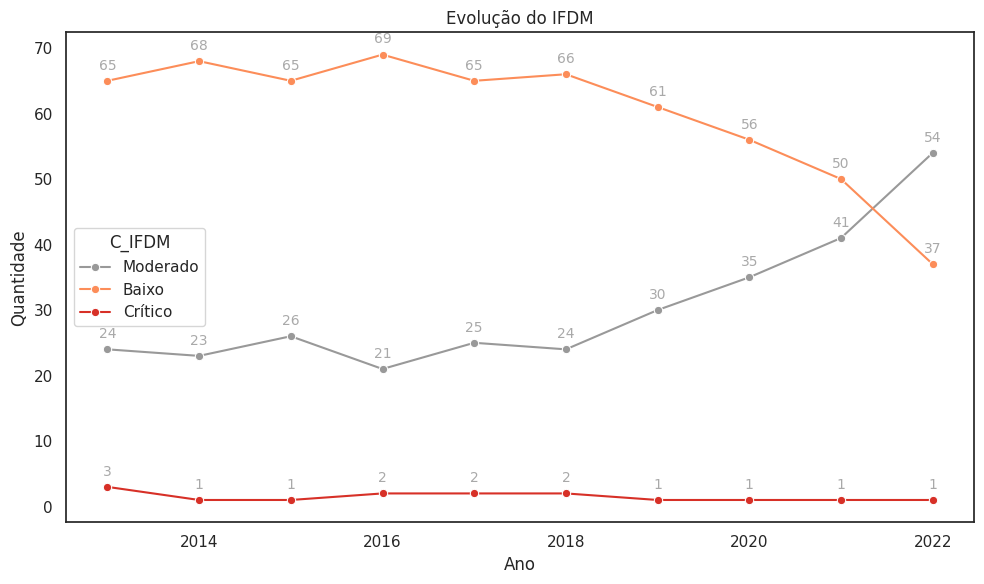

In [25]:
cores_personalizadas = {
    'Crítico': '#d73027',   # Vermelho
    'Baixo': '#fc8d59',     # Laranja
    'Moderado': '#999999'   # Amarelo
}

plotter = IFDMTemporalPlotter(df, x='Ano', y='Quantidade', hue='C_IFDM', title='Evolução do IFDM', palette=cores_personalizadas)
plotter.plot()

**Evolucao temporal IFGF**

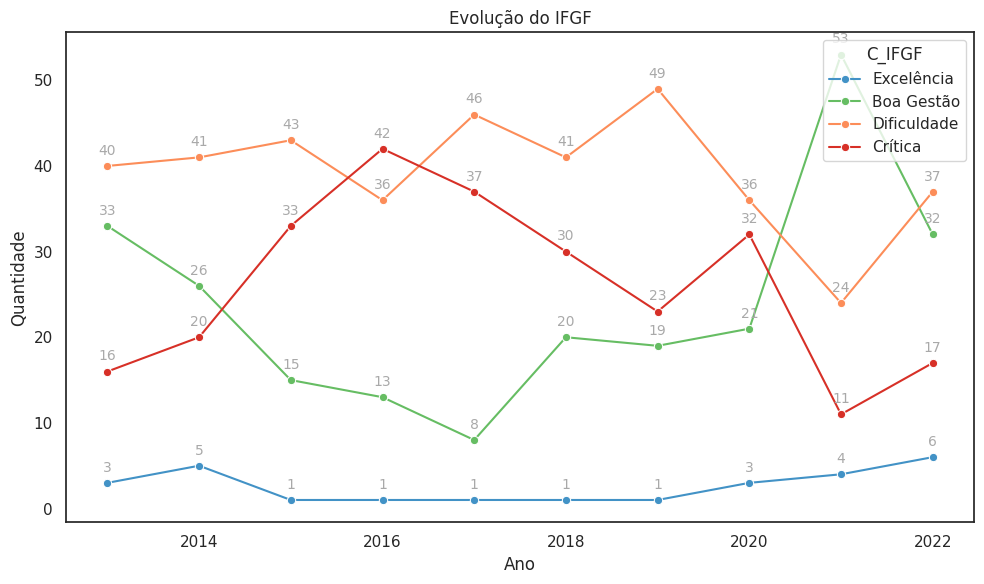

In [26]:
cores_personalizadas = {
    'Excelência': '#4292c6',   
    'Boa Gestão': '#66bd63',     
    'Dificuldade': '#fc8d59',  
    'Crítica': '#d73027'  
}

plotter = IFDMTemporalPlotter(df, x='Ano', y='Quantidade', hue='C_IFGF', title='Evolução do IFGF', palette=cores_personalizadas)
plotter.plot()

### Analise das correlacoes entre IDFM e IFGF



/tmp/ipykernel_1210/852997391.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col_ifdm]):
/tmp/ipykernel_1210/852997391.py:22: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col_ifgf]):


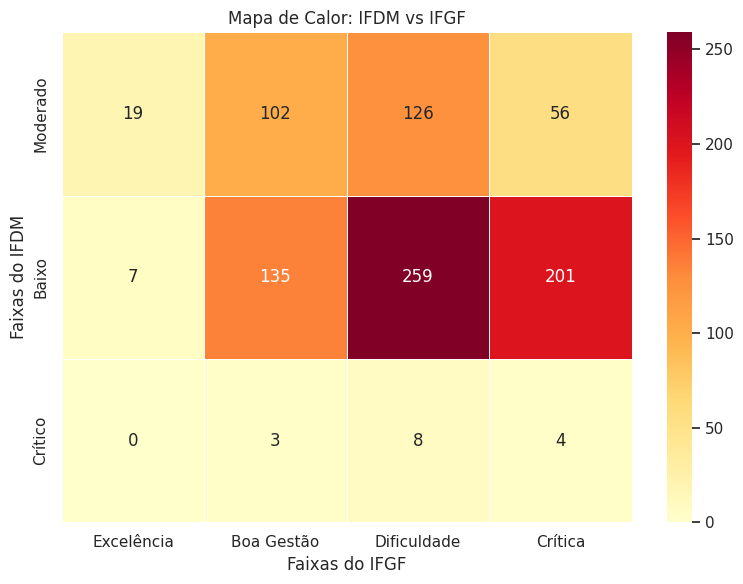

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_heatmap_ifdm_vs_ifgf(df, col_ifdm='C_IFDM', col_ifgf='C_IFGF', figsize=(8, 6), cmap='YlOrRd'):
    """
    Plota um mapa de calor entre as faixas categóricas do IFDM e do IFGF.

    Parâmetros:
    - df: DataFrame com as colunas categóricas.
    - col_ifdm: Nome da coluna com faixas do IFDM.
    - col_ifgf: Nome da coluna com faixas do IFGF.
    - figsize: Tamanho da figura (largura, altura).
    - cmap: Paleta de cores para o heatmap.
    """
    # Gera a matriz de frequência cruzada
    crosstab = pd.crosstab(df[col_ifdm], df[col_ifgf])

    # Ordena as categorias se forem categóricas
    if pd.api.types.is_categorical_dtype(df[col_ifdm]):
        crosstab = crosstab.reindex(df[col_ifdm].cat.categories)
    if pd.api.types.is_categorical_dtype(df[col_ifgf]):
        crosstab = crosstab[df[col_ifgf].cat.categories]

    # Plot do heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(crosstab, annot=True, fmt='d', cmap=cmap, linewidths=.5, cbar=True)
    plt.title('Mapa de Calor: IFDM vs IFGF')
    plt.xlabel('Faixas do IFGF')
    plt.ylabel('Faixas do IFDM')
    plt.tight_layout()
    plt.show()

plot_heatmap_ifdm_vs_ifgf(df)
